In [34]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##df1 = pd.read_csv('LCA_Disclosure_Data_FY2022_Q2.csv')
df2 = pd.read_csv('PW_Disclosure_Data_FY2022_Q2_revised_form.csv', low_memory=False)
df3 = pd.read_csv('PERM_Disclosure_Data_FY2022_Q2.csv', low_memory=False)


##print(df.to_string()) 

In [22]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)
pd.describe_option()

compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
compute.use_numba : bool
    Use the numba engine option for select operations if it is installed,
    the default is False
    Valid values: False,True
    [default: False] [currently: False]
compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.column_space No description available.
    [defa

In [17]:
df1.shape

(275657, 96)

In [21]:
df2.shape

(956477, 126)

In [19]:
df3.shape

(57533, 154)

In [50]:
df3.dtypes

CASE_NUMBER                            object
CASE_STATUS                            object
RECEIVED_DATE                          object
DECISION_DATE                          object
REFILE                                 object
ORIG_FILE_DATE                         object
PREVIOUS_SWA_CASE_NUMBER_STATE         object
SCHD_A_SHEEPHERDER                     object
EMPLOYER_NAME                          object
EMPLOYER_ADDRESS_1                     object
EMPLOYER_ADDRESS_2                     object
EMPLOYER_CITY                          object
EMPLOYER_STATE_PROVINCE                object
EMPLOYER_COUNTRY                       object
EMPLOYER_POSTAL_CODE                   object
EMPLOYER_PHONE                         object
EMPLOYER_PHONE_EXT                     object
EMPLOYER_NUM_EMPLOYEES                float64
EMPLOYER_YEAR_COMMENCED_BUSINESS      float64
NAICS_CODE                             object
FW_OWNERSHIP_INTEREST                  object
EMP_CONTACT_NAME                  

In [26]:
wage = ['PREVAILING_WAGE', 'PW_UNIT_OF_PAY' , 'PW_TRACKING_NUMBER', 'PW_WAGE_LEVEL', 'PW_OES_YEAR', 'PW_OTHER_SOURCE', 'PW_OTHER_YEAR',
'PW_SURVEY_PUBLISHER', 'PW_SURVEY_NAME']


num = ['TOTAL_WORKER_POSITIONS' ,'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT',
       'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'NAICS_CODE', 'WORKSITE_WORKERS', 'PW_OTHER_YEAR', 'TOTAL_WORKSITE_LOCATIONS']

In [58]:
num = ['NAICS_CODE', 'REQUIRED_TRAINING_MONTHS', 'REQUIRED_EXPERIENCE_MONTHS', 'ALT_TRAINING_MONTHS', 'ALT_EXPERIENCE_MONTHS'
      , 'ALT_PWD_WAGE_RATE']

In [61]:
num = ['EMPLOYER_NUM_EMPLOYEES', 'EMPLOYER_YEAR_COMMENCED_BUSINESS', 'REQUIRED_TRAINING_MONTHS', 'REQUIRED_EXPERIENCE_MONTHS', 
      'ACCEPT_ALT_COMBO_EDUCATION_YRS', 'ACCEPT_ALT_OCCUPATION_MONTHS', 'FOREIGN_WORKER_YRS_ED_COMP']

In [52]:
df[wage].info()

NameError: name 'df' is not defined

In [62]:
df3[num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57533 entries, 0 to 57532
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   EMPLOYER_NUM_EMPLOYEES            57523 non-null  float64
 1   EMPLOYER_YEAR_COMMENCED_BUSINESS  57519 non-null  float64
 2   REQUIRED_TRAINING_MONTHS          651 non-null    float64
 3   REQUIRED_EXPERIENCE_MONTHS        31318 non-null  float64
 4   ACCEPT_ALT_COMBO_EDUCATION_YRS    17000 non-null  float64
 5   ACCEPT_ALT_OCCUPATION_MONTHS      40003 non-null  float64
 6   FOREIGN_WORKER_YRS_ED_COMP        51139 non-null  float64
dtypes: float64(7)
memory usage: 3.1 MB


In [ ]:
df.mean()

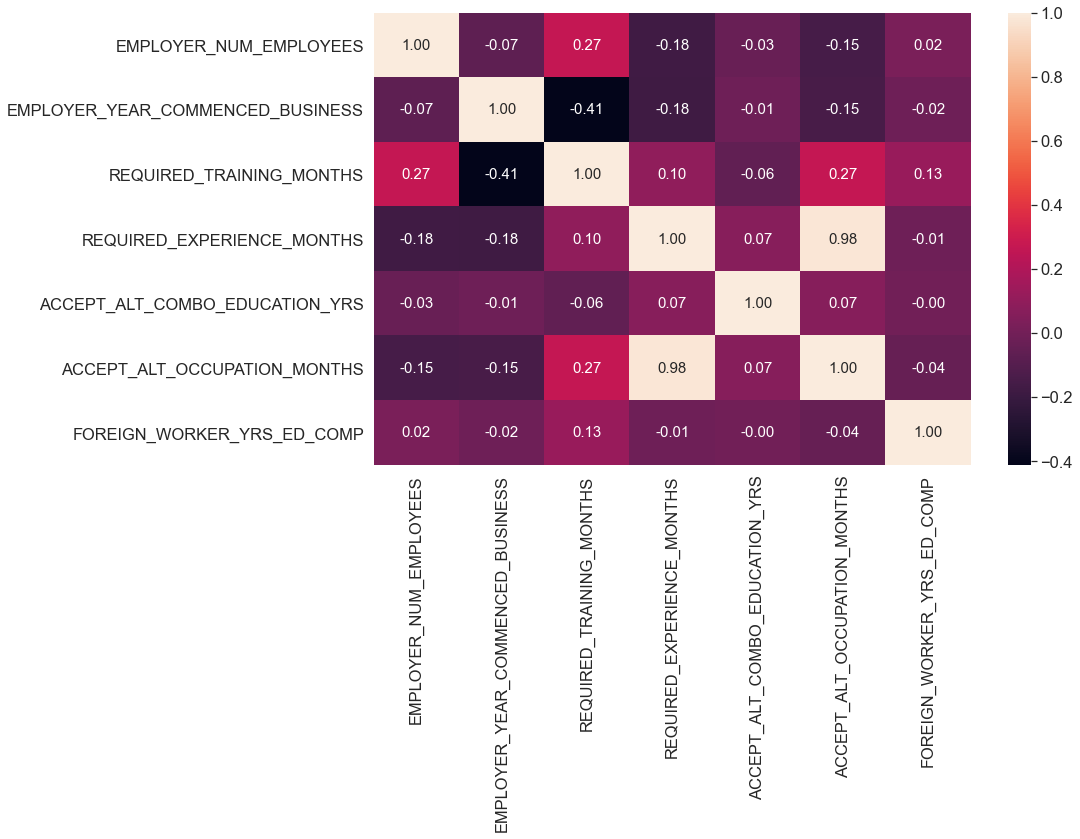

In [63]:

corr = df3[num].corr(method = 'pearson') #피어슨 상관계수를 구하는 것

fig = plt.figure(figsize = (16, 12)) #시각화
ax = fig.gca()

sns.set(font_scale=1.5) # seaborn library font 설정
hm = sns.heatmap(corr.values,#heatmap 사용
                 annot=True, 
                 fmt='.2f', #소수점 2번째 자리
                 annot_kws={'size': 15},
                 yticklabels=num,
                 xticklabels=num,
                 ax=ax)
plt.tight_layout() #창에 딱 맞게 설정
plt.show()

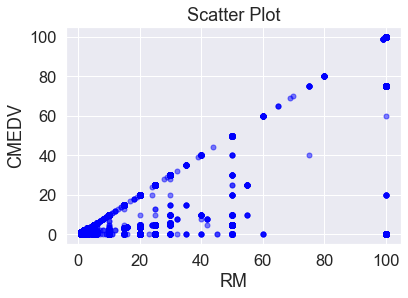

In [14]:
plt.plot('TOTAL_WORKER_POSITIONS', 'NEW_EMPLOYMENT', 
         data=df,
         linestyle='none', 
         marker='o', 
         markersize=5,
         color='blue', 
         alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('RM')
plt.ylabel('CMEDV')
plt.show()